<a href="https://colab.research.google.com/github/kavinda-athu/Image-processing-assignment-1/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


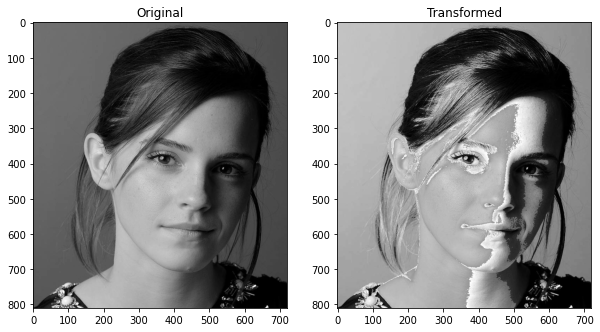

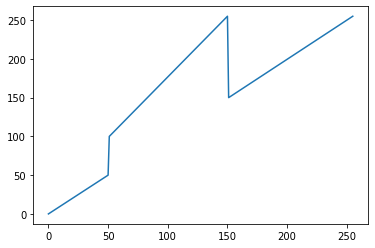

In [2]:
#Q1
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table
t1 = np.linspace(0,50,51);
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
t = np.concatenate((t1,t2,t3),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

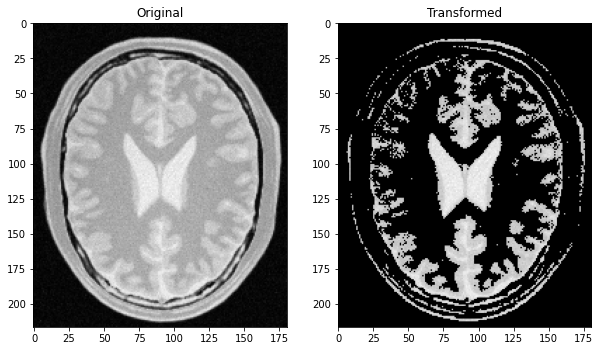

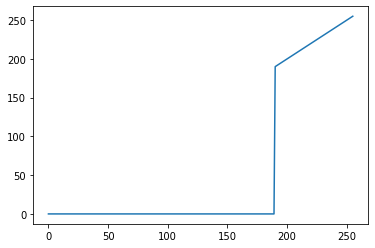

In [3]:
#Q2 part a
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table white matter
t1=np.linspace(0,0,190)
t2=np.linspace(190,255,66)
t = np.concatenate((t1,t2),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

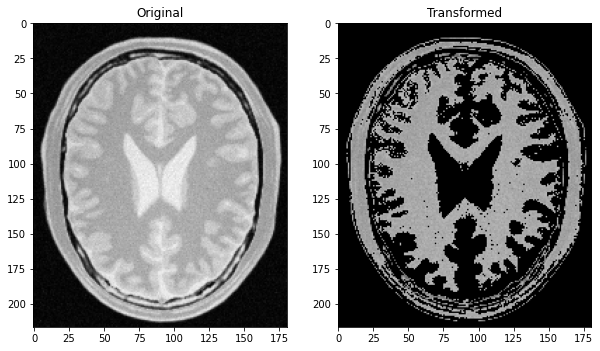

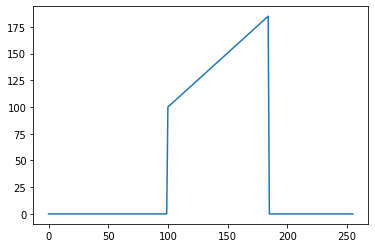

In [4]:
#Q2 part b
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert pic is not None

#making lookup table for gray matter
t1=np.linspace(0,0,100)
t2=np.linspace(100,185,85)
t3 = np.linspace(0,0,71)
t = np.concatenate((t1,t2,t3),axis=0)

#applying the intencity transform
out_pic = cv.LUT(pic,t);

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(out_pic,cmap="gray",vmax=255,vmin=0)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

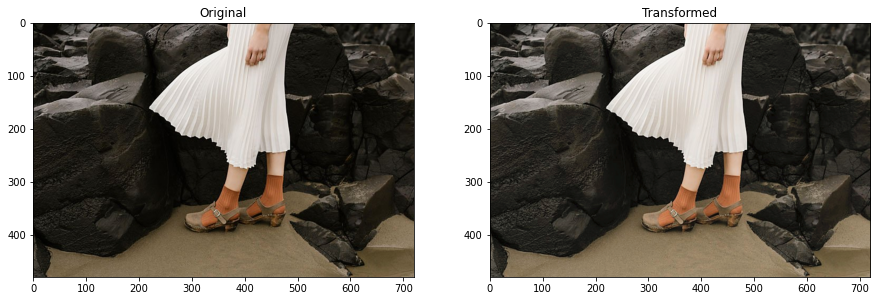

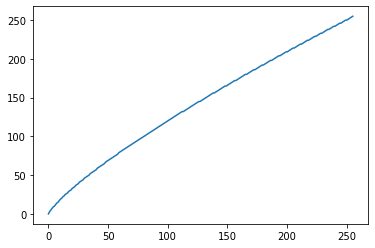

In [5]:
#Q3 part a
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert pic is not None
#converting to LAB colorspace
LAB_pic = cv.cvtColor(pic,cv.COLOR_BGR2LAB)
#splitting L,A,B values
L = LAB_pic[:,:,0]
A = LAB_pic[:,:,1]
B = LAB_pic[:,:,2]
#applying gamma tranform
gamma2=0.8
t=np.array([(p/255)**gamma2*255 for p in range(0,256)]).astype(np.uint8)
L = cv.LUT(L,t)
#merging sperated L,A,B
LAB_pic=cv.merge((L,A,B))
#converting RGB to plot
final_pic=cv.cvtColor(LAB_pic,cv.COLOR_LAB2RGB)
pic=cv.cvtColor(pic,cv.COLOR_BGR2RGB)

#ploting images
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(pic)
ax[0].set_title("Original")
ax[1].imshow(final_pic)
ax[1].set_title("Transformed")
plt.show()
plt.figure
plt.plot(t)

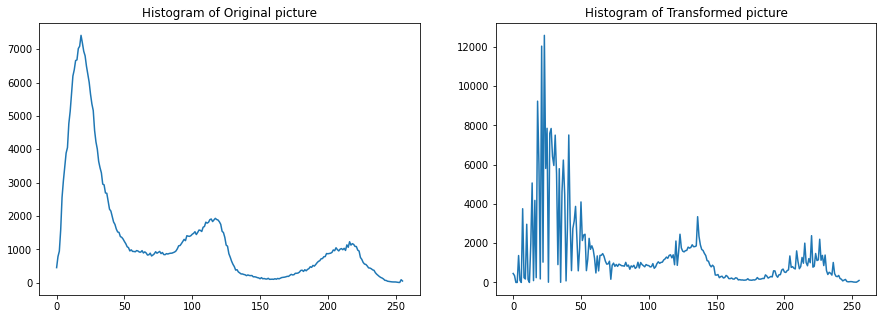

In [6]:
#Q3 part b
final_pic=cv.cvtColor(final_pic,cv.COLOR_RGB2GRAY)
pic=cv.cvtColor(pic,cv.COLOR_RGB2GRAY)

pic_hist = cv.calcHist([pic],[0],None,[256],[0,256]);
final_pic_hist = cv.calcHist([final_pic],[0],None,[256],[0,256]);
#ploting images
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(pic_hist)
ax[0].set_title("Histogram of Original picture")
ax[1].plot(final_pic_hist)
ax[1].set_title("Histogram of Transformed picture")
plt.show()

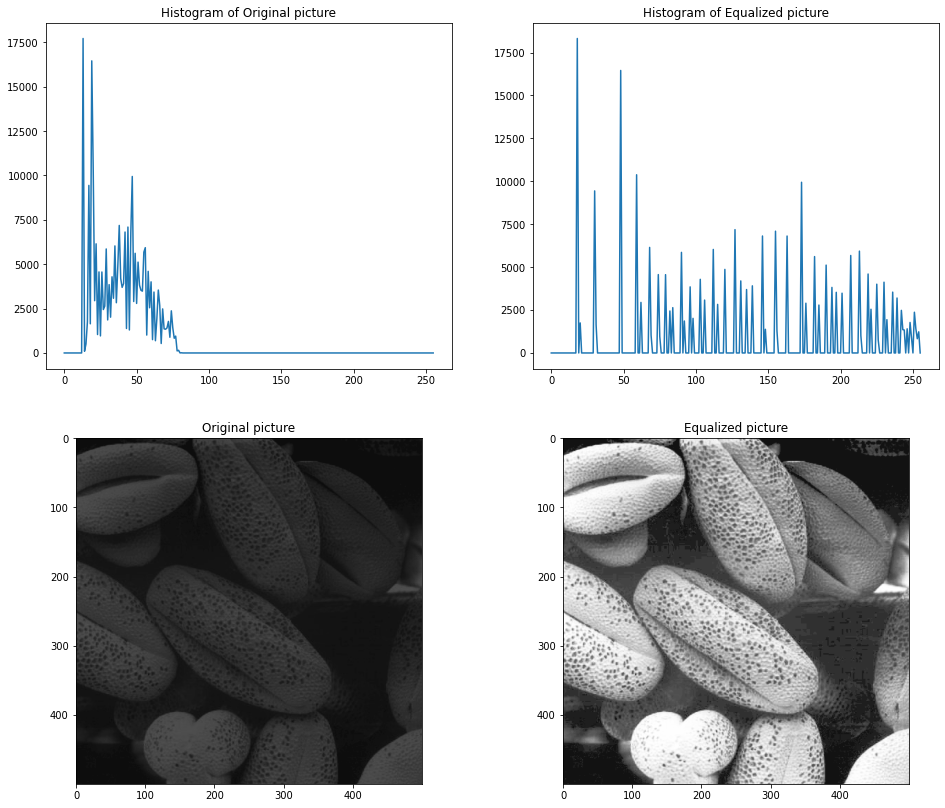

In [7]:
#Q4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/shells.png', cv.IMREAD_GRAYSCALE)
assert pic is not None

pic_hist = cv.calcHist([pic],[0],None,[256],[0,256]);
pixels = pic.size
PMF = pic_hist.astype(np.float32) / pixels
CDF = np.zeros(PMF.shape[0],dtype=np.float32)

for i in range(PMF.shape[0]):
  if i:
    CDF[i] = CDF[i-1] + PMF[i];
  else:
    CDF[i] = PMF[i];

t = np.array(CDF * (255)).astype(np.uint8)

eq_pic = cv.LUT(pic,t)
eq_pic_hist = cv.calcHist([eq_pic],[0],None,[256],[0,256])


#ploting histograms
fig,ax = plt.subplots(2,2,figsize=(16,14))
ax[0,0].plot(pic_hist)
ax[0,0].set_title("Histogram of Original picture")
ax[0,1].plot(eq_pic_hist)
ax[0,1].set_title("Histogram of Equalized picture")
ax[1,0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[1,0].set_title("Original picture")
ax[1,1].imshow(eq_pic,cmap="gray",vmax=255,vmin=0)
ax[1,1].set_title("Equalized picture")
plt.show()


Text(0.5, 1.0, 'zoomed bilinear interpolation')

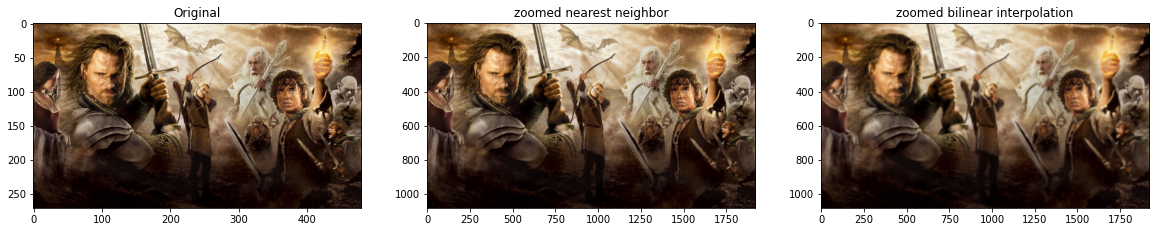

In [14]:
#Q5 part a and b

pic = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/a1q5images/im01small.png',cv.IMREAD_COLOR)
assert pic  is not None
pic  = cv.cvtColor(pic ,cv.COLOR_BGR2RGB)

def nearestNeighbor(originalpic,cons):
    zoomedpic = np.zeros((int(originalpic.shape[0] * cons), int(originalpic.shape[1] * cons)),dtype=np.uint8)
    for y in range(int(originalpic.shape[0] * cons)):
        for x in range(int(originalpic.shape[1]* cons)):

            y0 = y // cons
            if y%cons>=0.5:
                y0+=1
            if y0 > originalpic.shape[0]-1:
                y0 = originalpic.shape[0]-1
                

            x0 = x // cons
            if x%cons>=0.5:
                x0+=1
            if x0 > originalpic.shape[1]-1:
                x0 = originalpic.shape[1]-1


            zoomedpic[y,x] = originalpic[y0,x0]
    return zoomedpic


def bilinearInterpolation(originalpic,cons):
    zoomedpic = np.zeros((int(originalpic.shape[0] * cons),int(originalpic.shape[1] * cons)),dtype=np.uint8)
    for y in range(int(originalpic.shape[0] * cons)):
        for x in range(int(originalpic.shape[1] * cons)):
            y0 = (y / cons);
            x0 = (x / cons);
            y_propotionalConstant = y0 %1
            x_propotionalConstant = x0 %1
            y00 = int(y0)
            x00 = int(x0)
            y01 = min(originalpic.shape[0]-1,y00+1)
            x01 = min(originalpic.shape[1]-1,x00+1)
            
            x_0_inten = originalpic[y00,x00]*y_propotionalConstant + originalpic[y01,x00]*(1-y_propotionalConstant)
            x_1_inten = originalpic[y00,x01]*y_propotionalConstant + originalpic[y01,x01]*(1-y_propotionalConstant)
            
            inten = x_0_inten * x_propotionalConstant  + x_1_inten * (1-x_propotionalConstant)
            inten = int(inten)
            
            zoomedpic[y,x] = inten
    return zoomedpic

def ZOOM_nearestNeighbor(originalpic,cons):
    a1,a2,a3 = cv.split(originalpic);
    return cv.merge((nearestNeighbor(a1,cons),nearestNeighbor(a2,cons),nearestNeighbor(a3,cons)))
def ZOOM_bilinearInterpolation(originalpic,cons):
    b1,b2,b3 = cv.split(originalpic);
    return cv.merge((bilinearInterpolation(b1,cons),bilinearInterpolation(b2,cons),bilinearInterpolation(b3,cons))) 
zoomedpicNearest = ZOOM_nearestNeighbor(pic ,4);
zoomedpicBilinear = ZOOM_bilinearInterpolation(pic ,4);
#visualize the result
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(pic)
ax[0].set_title("Original")
ax[1].imshow(zoomedpicNearest)
ax[1].set_title("zoomed nearest neighbor")
ax[2].imshow(zoomedpicBilinear)
ax[2].set_title("zoomed bilinear interpolation")

In [15]:
small = ["im01small.png","im02small.png","im03.png"];
zoomed = ["im01.png","im02.png","im03.png"];
print("Nearest neighbor")
for i in range(2):
    picS = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/a1q5images/'+small[i] ,cv.IMREAD_COLOR)
    picZ = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/a1q5images/'+zoomed[i] ,cv.IMREAD_COLOR)
    zoomedNearest = ZOOM_nearestNeighbor(picS ,4)
    SSD = np.sum((zoomedNearest - picZ)**2)/(picZ.shape[0]*picZ.shape[1]*picZ.shape[2])
    print("image ", i,"SSD = ",SSD)
    
print("Bilinear interpolation")
for i in range(2):
    picS  = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/a1q5images/'+small[i] ,cv.IMREAD_COLOR)
    picZ  = cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/a1q5images/'+zoomed[i] ,cv.IMREAD_COLOR)
    zoomedBilinear = ZOOM_bilinearInterpolation(picS ,4)
    SSD = np.sum((zoomedBilinear - picZ)**2)/(picZ.shape[0]*picZ.shape[1]*picZ.shape[2])
    print("image ", i,"SSD = ",SSD)

Nearest neighbor
image  0 SSD =  52.55124839248971
image  1 SSD =  23.602486545138888
Bilinear interpolation
image  0 SSD =  50.66079282407407
image  1 SSD =  22.207302806712963


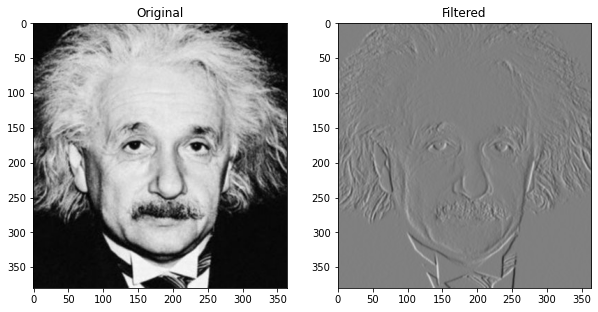

In [8]:
#Q6 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert pic is not None

box_hori=np.array([[-1,0,1],[-2,0,2],[-1,0,1,]],dtype=np.float32)
pic_ver = cv.filter2D(pic,-1,box_hori)

#ploting images
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pic,cmap="gray",vmax=255,vmin=0)
ax[0].set_title("Original")
ax[1].imshow(pic_ver ,cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Filtered")
plt.show()

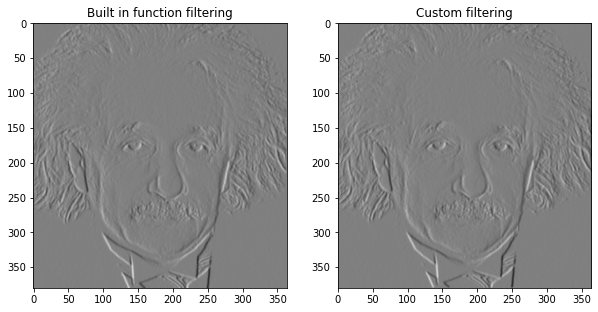

In [9]:
#Q6 part b
dum = np.zeros(pic.shape,dtype=np.float32)

for y in range(dum.shape[0]):
  for x in range(dum.shape[1]):
    k_val_sum = 0;
    for i1 in range(3):
      for i2 in range(3):
        k_val = box_hori[i1,i2]
        #identifying the overlapping pixel for each pixel in the kernel
        picY = y + i1
        picX = x + i2
        #zero padding
        if (0<=picY<pic.shape[0] and 0<=picX<pic.shape[1]):
          pixel_val = pic[picY,picX]
          k_val_sum += k_val * pixel_val;
    dum[y,x] =k_val_sum

fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(pic_ver ,cmap="gray",vmin=-1020,vmax=1020)
ax[0].set_title("Built in function filtering")
ax[1].imshow(dum,cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Custom filtering")
plt.show()

Text(0.5, 1.0, 'Filtered using two 1D kernels')

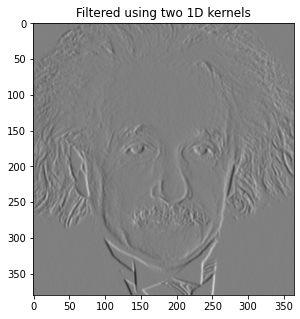

In [10]:
#Q6 part c
#instead of using a 2D kernel, we can use 1D kernels two times..which results in less computational  complexity
vertical_kernel = np.array([1,2,1],dtype=np.float32)
horizontal_kernel = np.array([1,0,-1],dtype=np.float32)
filtered = cv.sepFilter2D(pic,-1,horizontal_kernel,vertical_kernel)
fig, ax = plt.subplots(1,figsize=(10,5))
ax.imshow(filtered,cmap="gray",vmin=-1020,vmax=1020)
ax.set_title("Filtered using two 1D kernels")

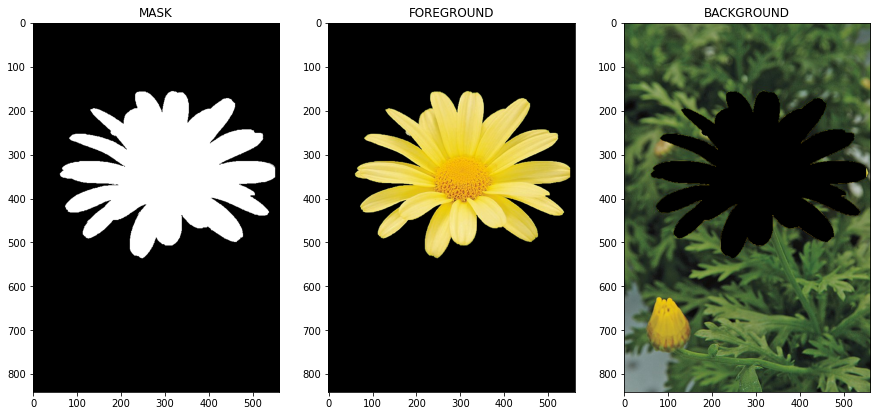

In [11]:
#Q7 part a
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
pic=cv.imread(r'/content/gdrive/My Drive/Colab Notebooks/assignment1/daisy.jpg',cv.IMREAD_COLOR)
assert pic is not None

pic = cv.cvtColor(pic,cv.COLOR_BGR2RGB)

mask_dum= np.zeros(pic.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
vals = (50,110,500,500)
cv.grabCut(pic,mask_dum,vals,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask_flower= np.where((mask_dum==2)|(mask_dum==0),0,1).astype('uint8')

pic1 = pic*mask_flower[:,:,np.newaxis]
Mask_background = (mask_flower==0).astype(np.int8);
pic2 = pic*Mask_background[:,:,np.newaxis]

fig,ax = plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(mask_flower,cmap="gray")
ax[0].set_title("MASK")
ax[1].imshow(pic1)
ax[1].set_title("FOREGROUND")
ax[2].imshow(pic2)
ax[2].set_title("BACKGROUND")
plt.show()

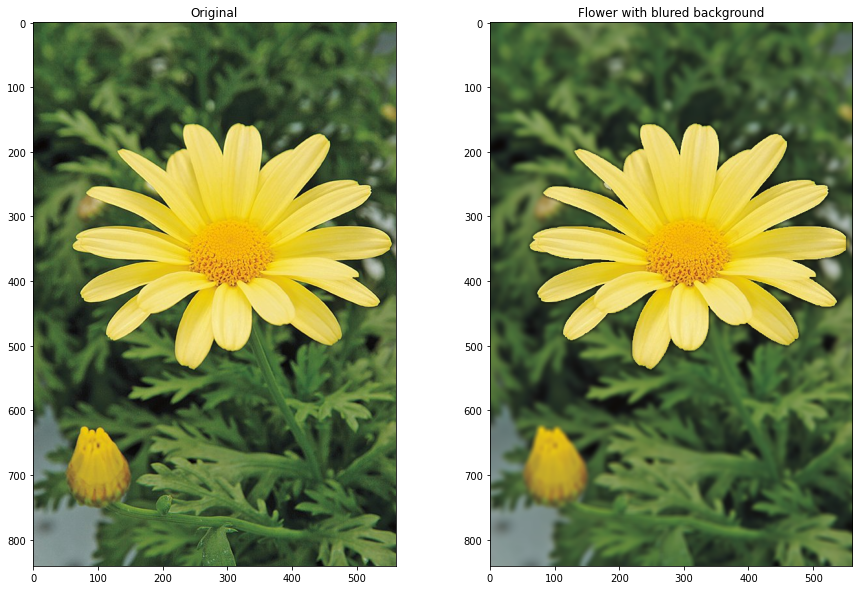

In [12]:
#Q7 part b
k_size=9
sigma=4
blured_background = cv.GaussianBlur(pic2,(k_size,k_size),sigma)
final = blured_background*Mask_background[:,:,np.newaxis] + pic1
fig,ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(pic)
ax[0].set_title("Original")
ax[1].imshow(final )
ax[1].set_title("Flower with blured background")
plt.show()

In [13]:
#Q7 part c
#When we add the blured background and flower separately there are some remaining black pixels beyond the edge of the flower.